## Compare importances

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import graphviz
import matplotlib.pyplot as plt

### Load regional data

Random Forest validation score:  0.930234308110131


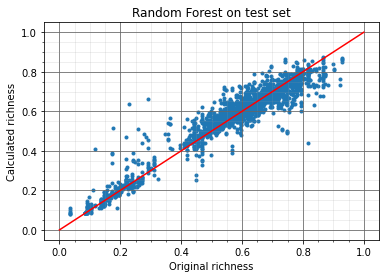

In [34]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/bulgaria_out_closest_point_mean_handle_custom_set.csv"

bu = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = bu[regression_label].values
X = bu.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_bu = RandomForestRegressor(n_estimators=100, max_depth=None)
rfr_bu = rfr_bu.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_bu.score(X_test, y_test))

# Compare with scatterplot
y_hat = rfr_bu.predict(X_test)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
plt.figure()
plt.scatter(y_test, y_hat, marker=".")  
plt.xlabel("Original richness")
plt.ylabel("Calculated richness")
plt.title("Random Forest on test set")
plt.plot( [0,1],[0,1], "-r" )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [11]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/italy_out_closest_point_mean_handle_custom_set.csv"

it = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = it[regression_label].values
X = it.drop(columns=[regression_label]).values #returns a numpy array

In [12]:
it.describe()

,habitat_richness,NDVI,ALBH-AL-BH-VI,ALBH-AL-BH-BB,ALBH-AL-BH-NI,ALDH-AL-DH-NI,ALDH-AL-DH-VI,ALDH-AL-DH-BB,DMP300-RT5-DMP,FAPAR300-FAPAR,...,ssr,str,sp,ssrd,strd,tp,swvl1,swvl2,swvl3,swvl4
count,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,...,1.738700e+04,1.738700e+04,17387.000000,1.738700e+04,1.738700e+04,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000
mean,0.347814,207.448035,440.982884,1769.351153,2701.463314,2061.583329,529.534422,1417.997010,9730.056908,128.878487,...,1.248173e+07,-4.987362e+06,93768.397383,1.489797e+07,2.740911e+07,0.003312,0.344974,0.346578,0.340406,0.374875
std,0.073995,28.558934,123.536460,179.413060,284.975463,279.732072,286.319154,233.972063,1697.487967,26.217156,...,3.540586e+05,4.047451e+05,3561.758347,2.981752e+05,6.232524e+05,0.000490,0.018227,0.017545,0.019193,0.014856
min,0.043478,59.333333,47.000000,217.000000,260.000000,877.000000,239.000000,668.000000,-2.000000,26.888889,...,1.160522e+07,-6.271293e+06,85057.734000,1.425301e+07,2.631730e+07,0.001693,0.262658,0.286981,0.269559,0.272963
25%,0.297331,194.333333,362.000000,1664.000000,2531.000000,1872.000000,453.000000,1288.000000,8716.208333,108.555556,...,1.224969e+07,-5.282506e+06,90832.620000,1.474833e+07,2.691194e+07,0.002975,0.335549,0.337761,0.327281,0.371059
50%,0.346522,214.888889,432.000000,1779.750000,2715.500000,2043.000000,503.500000,1402.085140,9836.166667,127.333333,...,1.246385e+07,-5.005538e+06,93870.900000,1.489435e+07,2.737516e+07,0.003306,0.347462,0.347651,0.342903,0.376750
75%,0.397577,227.833333,511.000000,1891.000000,2895.000000,2239.000000,552.000000,1525.000000,10941.503472,147.666667,...,1.263494e+07,-4.732039e+06,96596.510000,1.502604e+07,2.788114e+07,0.003708,0.357757,0.358442,0.355033,0.382673
max,0.544446,250.000000,3933.000000,3711.000000,4168.000000,4113.000000,5837.000000,4801.000000,15072.888889,255.000000,...,1.455645e+07,-3.708556e+06,101794.030000,1.606106e+07,2.919787e+07,0.004253,0.405954,0.421237,0.430248,0.475594


Random Forest validation score:  0.7323221180419089


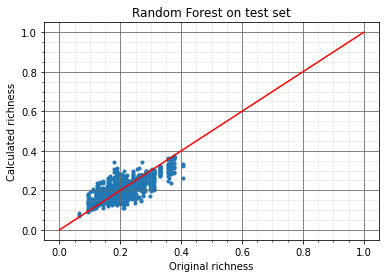

In [48]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/finland_out_closest_point_mean_handle_custom_set.csv"

fi = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = fi[regression_label].values
X = fi.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
#y_train = np.log(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_fi = RandomForestRegressor(n_estimators=100, max_depth=50)
rfr_fi = rfr_fi.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_fi.score(X_test, y_test))

# Compare with scatterplot
y_hat = rfr_fi.predict(X_test)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
plt.figure()
plt.scatter(y_test, y_hat, marker=".")  
plt.xlabel("Original richness")
plt.ylabel("Calculated richness")
plt.title("Random Forest on test set")
plt.plot( [0,1],[0,1], "-r" )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Random Forest validation score:  0.7779560899595624


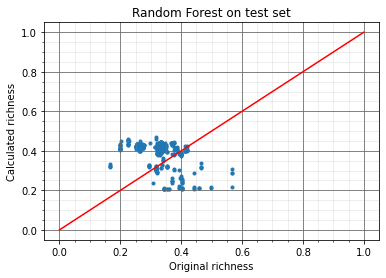

In [14]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/france_out_closest_point_mean_handle_custom_set.csv"

fr = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = fr[regression_label].values
X = fr.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

rfr_fr = RandomForestRegressor(n_estimators=100, max_depth=None)
rfr_fr = rfr_fr.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_fr.score(X_test, y_test))

# Compare with scatterplot
y_hat = rfr_bu.predict(X_test)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
plt.figure()
plt.scatter(y_test, y_hat, marker=".")  
plt.xlabel("Original richness")
plt.ylabel("Calculated richness")
plt.title("Random Forest on test set")
plt.plot( [0,1],[0,1], "-r" )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Random Forest validation score:  -0.3714372469181084


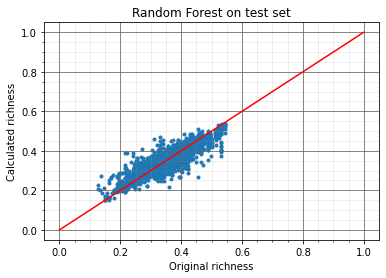

In [37]:
regression_label = 'habitat_richness'
folder = "../Dataset"
file = "/italy_out_closest_point_mean_handle_custom_set.csv"

it = pd.read_csv(folder + file, index_col=['longitude', 'latitude'])
#df = df[df[regression_label] > 0]
y = it[regression_label].values
X = it.drop(columns=[regression_label]).values #returns a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the data
X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

# Test values have to be normalized with the training mean and std
y_scaler.fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
y = y_scaler.transform(y.reshape(-1, 1)).ravel()
X_scaler.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X = X_scaler.transform(X)

# Train the model
rfr_it = RandomForestRegressor(n_estimators=100, max_depth=None)
rfr_it = rfr_it.fit(X_train,y_train)
print("Random Forest validation score: ", rfr_bu.score(X_test, y_test))

# Compare with scatterplot
y_hat = rfr_it.predict(X_test)
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
plt.figure()
plt.scatter(y_test, y_hat, marker=".")  
plt.xlabel("Original richness")
plt.ylabel("Calculated richness")
plt.title("Random Forest on test set")
plt.plot( [0,1],[0,1], "-r" )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Feature ranking:
1. feature stl3 (0.257047)
2. feature str (0.104176)
3. feature ssrd (0.068683)
4. feature slhf (0.039986)
5. feature ssr (0.039742)
6. feature sp (0.038061)
7. feature tp (0.029569)
8. feature src (0.026891)
9. feature strd (0.023368)
10. feature lai_lv (0.020659)
11. feature swvl3 (0.017789)
12. feature TOCR-REF-NOR-NIR (0.016894)
13. feature swvl1 (0.016584)
14. feature ALBH-AL-BH-VI (0.016574)
15. feature ALDH-AL-DH-BB (0.015892)
16. feature swvl4 (0.014620)
17. feature fal (0.012855)
18. feature lai_hv (0.012648)
19. feature TOCR-REF-NOR-SWIR (0.012450)
20. feature NDVI (0.012255)
21. feature FAPAR300-FAPAR (0.012179)
22. feature FCOVER300-FCOVER (0.012133)
23. feature ALDH-AL-DH-NI (0.011607)
24. feature skt (0.011539)
25. feature ALBH-AL-BH-BB (0.010102)
26. feature ALBH-AL-BH-NI (0.010098)
27. feature LAI300-LAI (0.009520)
28. feature ALDH-AL-DH-VI (0.009215)
29. feature stl2 (0.009149)
30. feature SWI1km-SWI-002 (0.008486)
31. feature DMP300-RT5-DMP (0.008087)

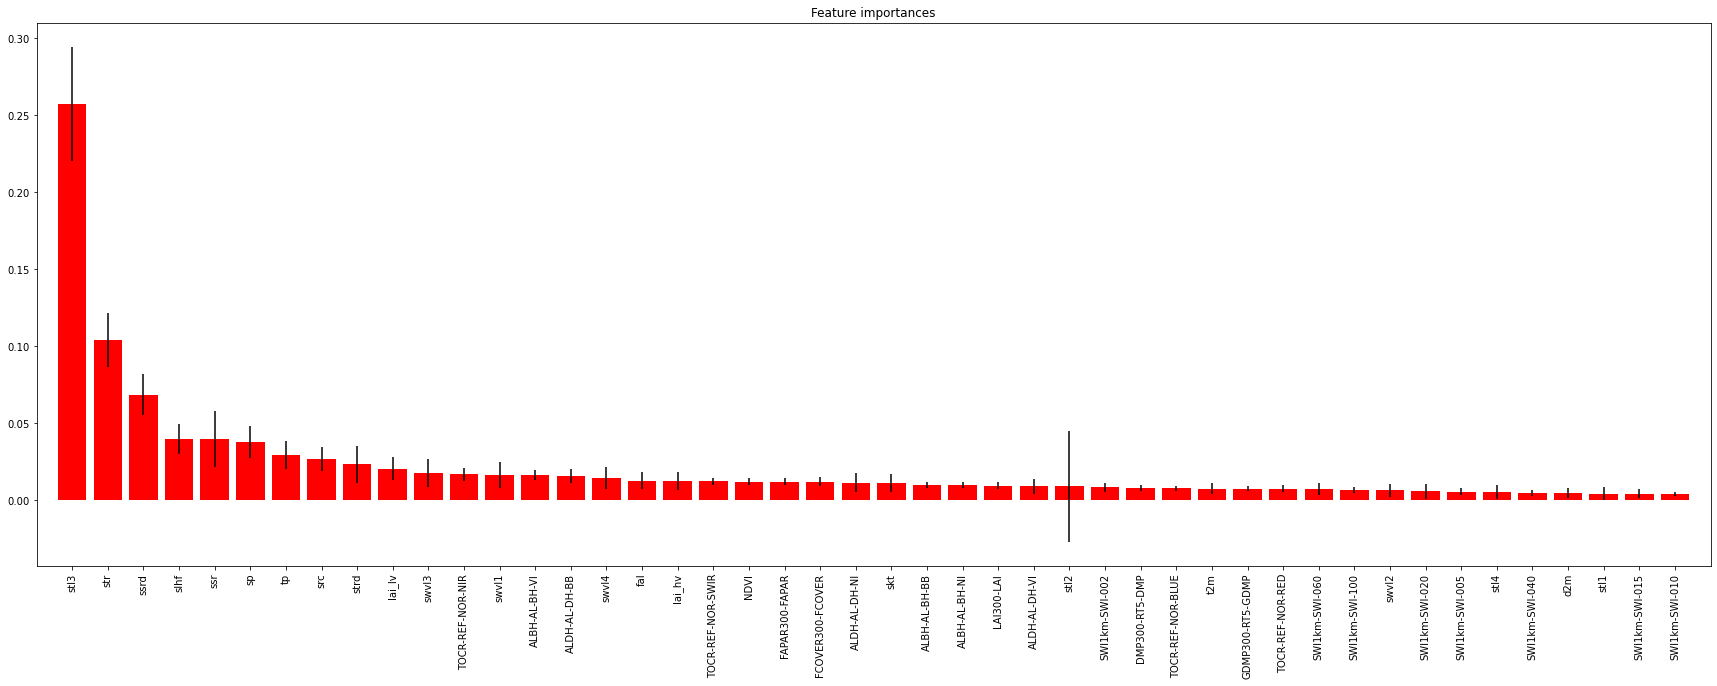

In [16]:
importances = rfr_bu.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_bu.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(bu.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature strd (0.106177)
2. feature lai_lv (0.067054)
3. feature ssrd (0.059201)
4. feature swvl4 (0.053283)
5. feature tp (0.042164)
6. feature str (0.029021)
7. feature SWI1km-SWI-100 (0.028729)
8. feature slhf (0.028129)
9. feature NDVI (0.026358)
10. feature DMP-RT6-DMP (0.025620)
11. feature swvl3 (0.025238)
12. feature ssr (0.024105)
13. feature swvl1 (0.023455)
14. feature SWI1km-SWI-002 (0.023156)
15. feature swvl2 (0.022861)
16. feature fal (0.022690)
17. feature sp (0.021578)
18. feature TOCR-REF-NOR-SWIR (0.018118)
19. feature src (0.017624)
20. feature stl1 (0.017354)
21. feature SWI1km-SWI-005 (0.016441)
22. feature SWI1km-SWI-060 (0.016437)
23. feature skt (0.016319)
24. feature t2m (0.016130)
25. feature TOCR-REF-NOR-NIR (0.016086)
26. feature TOCR-REF-NOR-BLUE (0.016068)
27. feature d2m (0.015869)
28. feature GDMP300-RT5-GDMP (0.015330)
29. feature FCOVER300-FCOVER (0.015036)
30. feature stl4 (0.014365)
31. feature stl3 (0.013662)
32. feature stl2 (0.

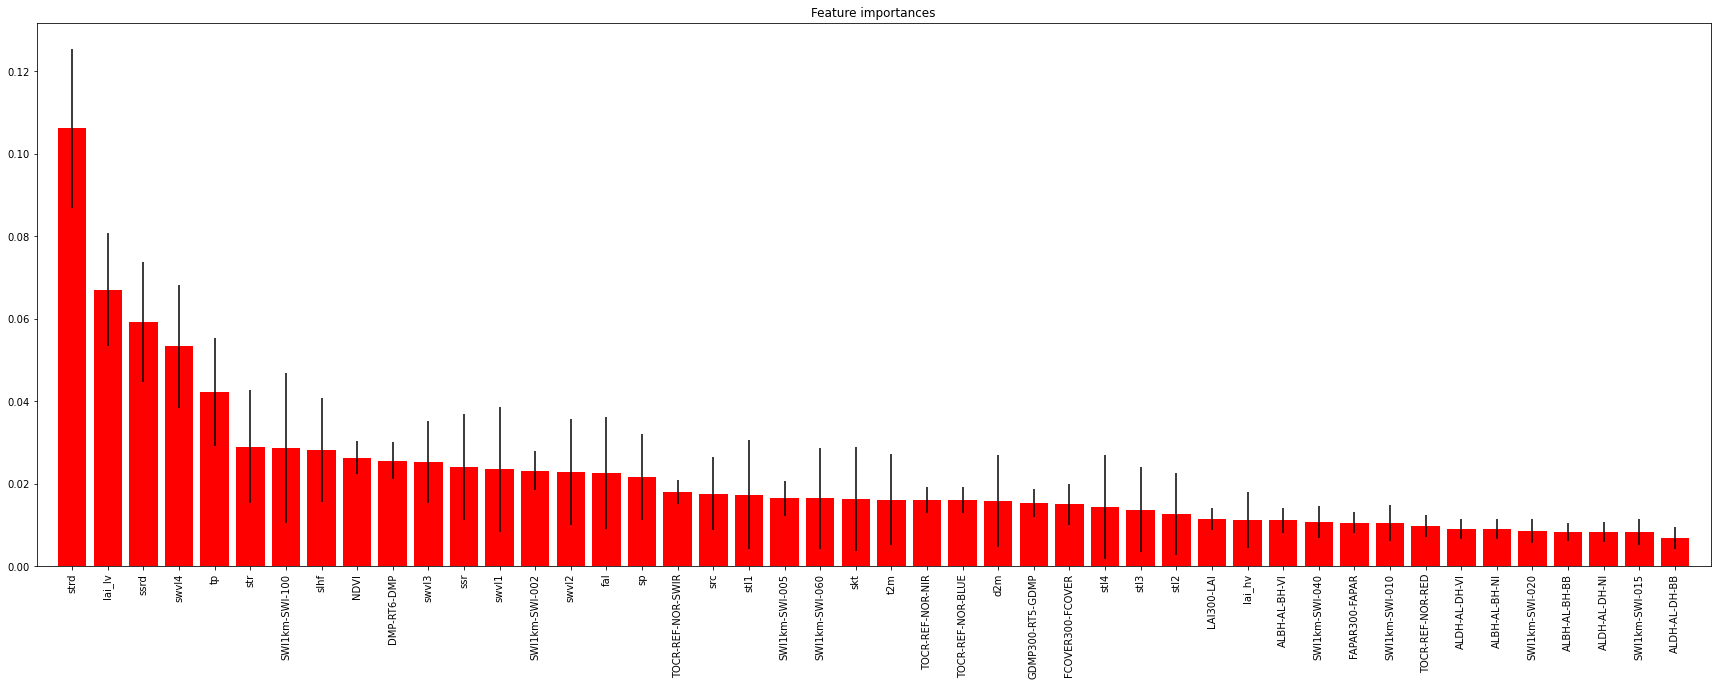

In [17]:
importances = rfr_fi.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(fi.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

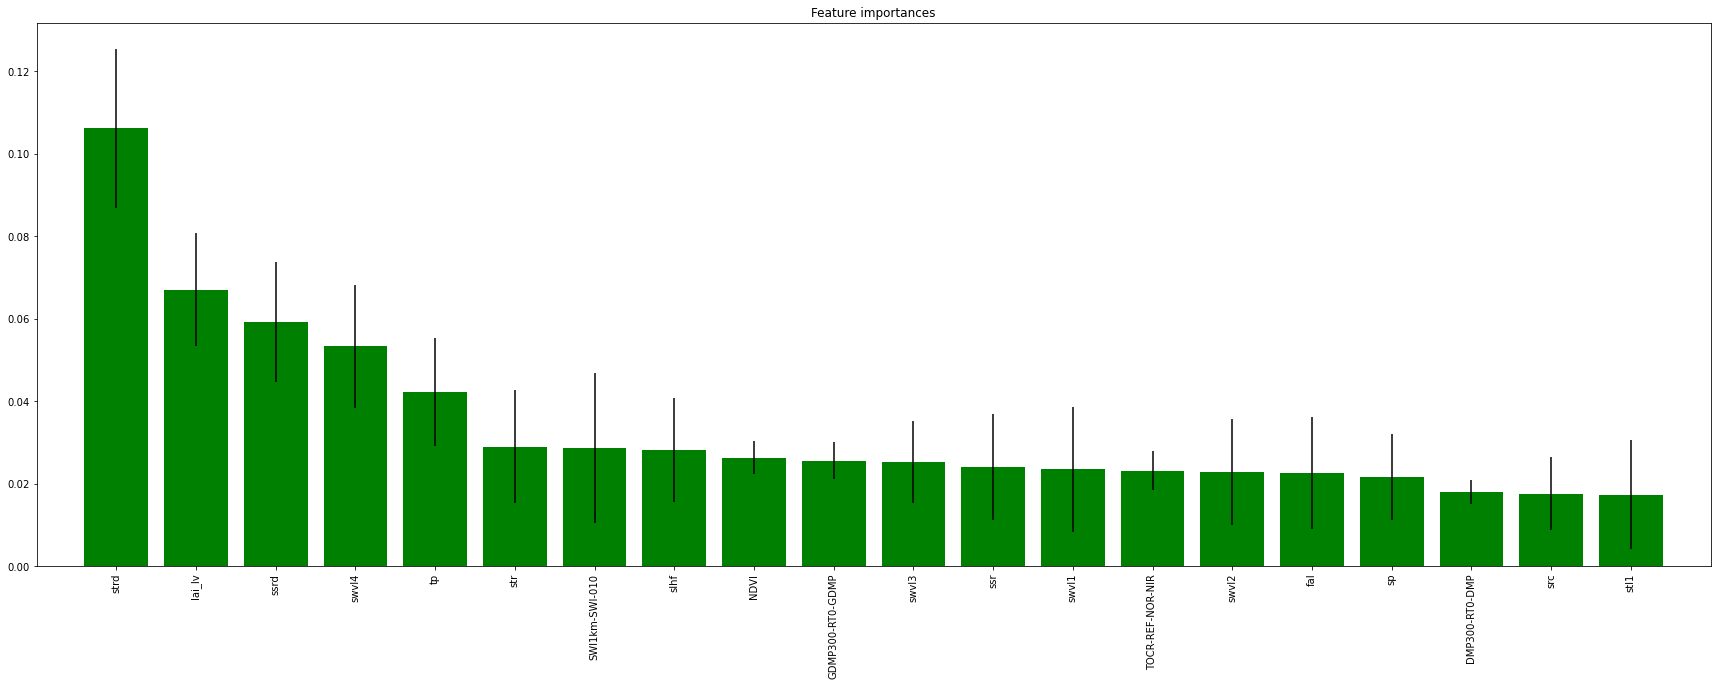

In [18]:
importances = rfr_fi.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

num_feats = 20 # number of features to visualize
indices = indices[:num_feats]
feat_names = list(fr.drop(columns=[regression_label]).columns.values) 

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
        color="g", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), names, rotation=90)
plt.xlim([-1, len(indices)])
plt.show()

fig.savefig('fi_importances.png')

Feature ranking:
1. feature stl3 (0.257047)
2. feature str (0.104176)
3. feature ssrd (0.068683)
4. feature slhf (0.039986)
5. feature ssr (0.039742)
6. feature sp (0.038061)
7. feature tp (0.029569)
8. feature src (0.026891)
9. feature strd (0.023368)
10. feature lai_lv (0.020659)
11. feature swvl3 (0.017789)
12. feature TOCR-REF-NOR-NIR (0.016894)
13. feature swvl1 (0.016584)
14. feature ALBH-AL-BH-VI (0.016574)
15. feature ALDH-AL-DH-VI (0.015892)
16. feature swvl4 (0.014620)
17. feature fal (0.012855)
18. feature lai_hv (0.012648)
19. feature TOCR-REF-NOR-SWIR (0.012450)
20. feature NDVI (0.012255)
21. feature FAPAR300-FAPAR (0.012179)
22. feature FCOVER300-FCOVER (0.012133)
23. feature ALDH-AL-DH-BB (0.011607)
24. feature skt (0.011539)
25. feature ALBH-AL-BH-BB (0.010102)
26. feature ALBH-AL-BH-NI (0.010098)
27. feature LAI300-LAI (0.009520)
28. feature ALDH-AL-DH-NI (0.009215)
29. feature stl2 (0.009149)
30. feature SWI1km-SWI-002 (0.008486)
31. feature DMP300-RT5-DMP (0.008087)

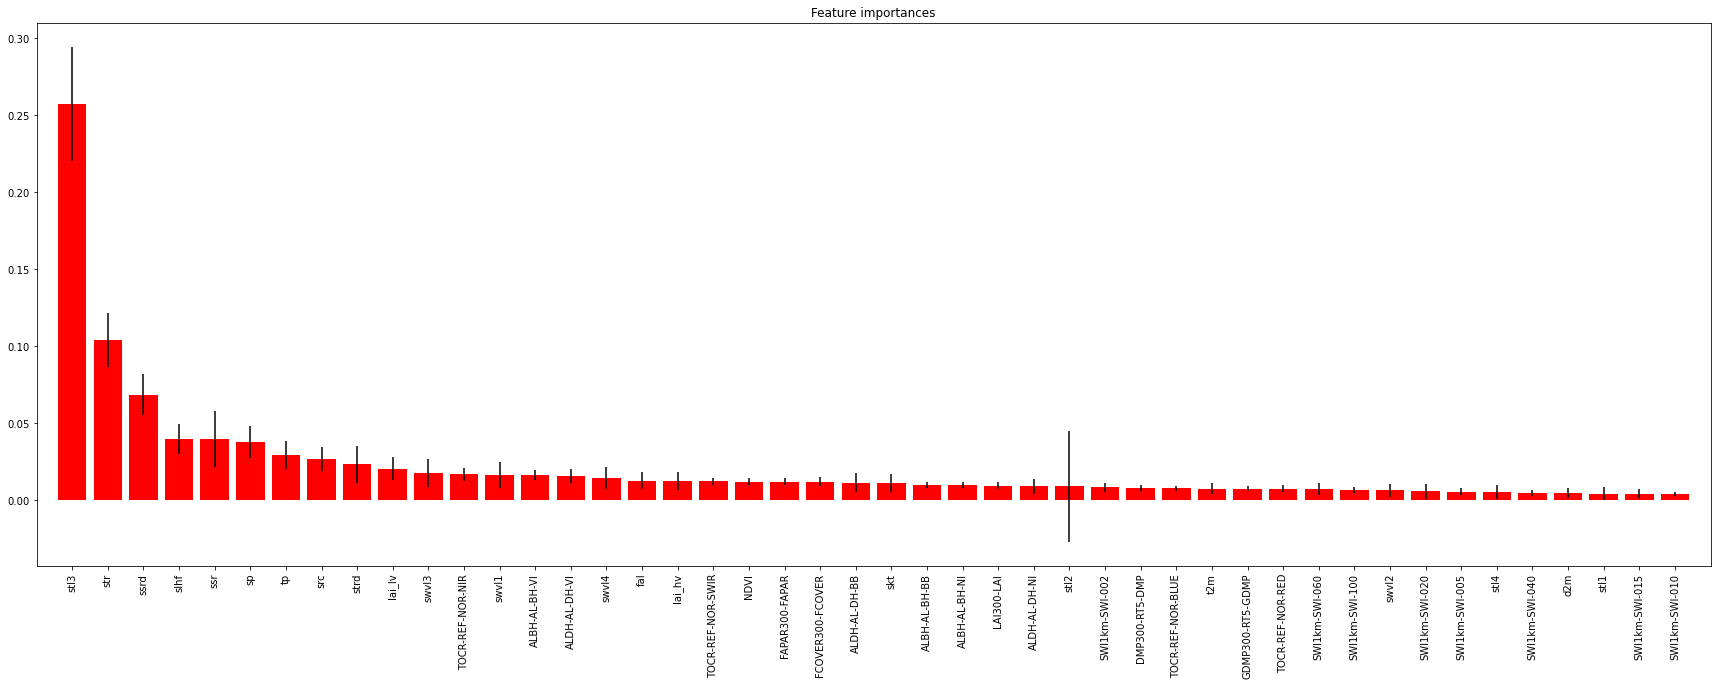

In [19]:
importances = rfr_it.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_it.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

feat_names = list(it.drop(columns=[regression_label]).columns.values) 

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importances[indices[f]]))

names = [feat_names[i] for i in indices]
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
importances_fr = rfr_fr.feature_importances_
importances_it = rfr_it.feature_importances_
importances_bu = rfr_bu.feature_importances_
importances_fi = rfr_fi.feature_importances_
std_fr = np.std([tree.feature_importances_ for tree in rfr_fr.estimators_],axis=0)
std_it = np.std([tree.feature_importances_ for tree in rfr_it.estimators_],axis=0)
std_bu = np.std([tree.feature_importances_ for tree in rfr_bu.estimators_],axis=0)
std_fi = np.std([tree.feature_importances_ for tree in rfr_fi.estimators_],axis=0)

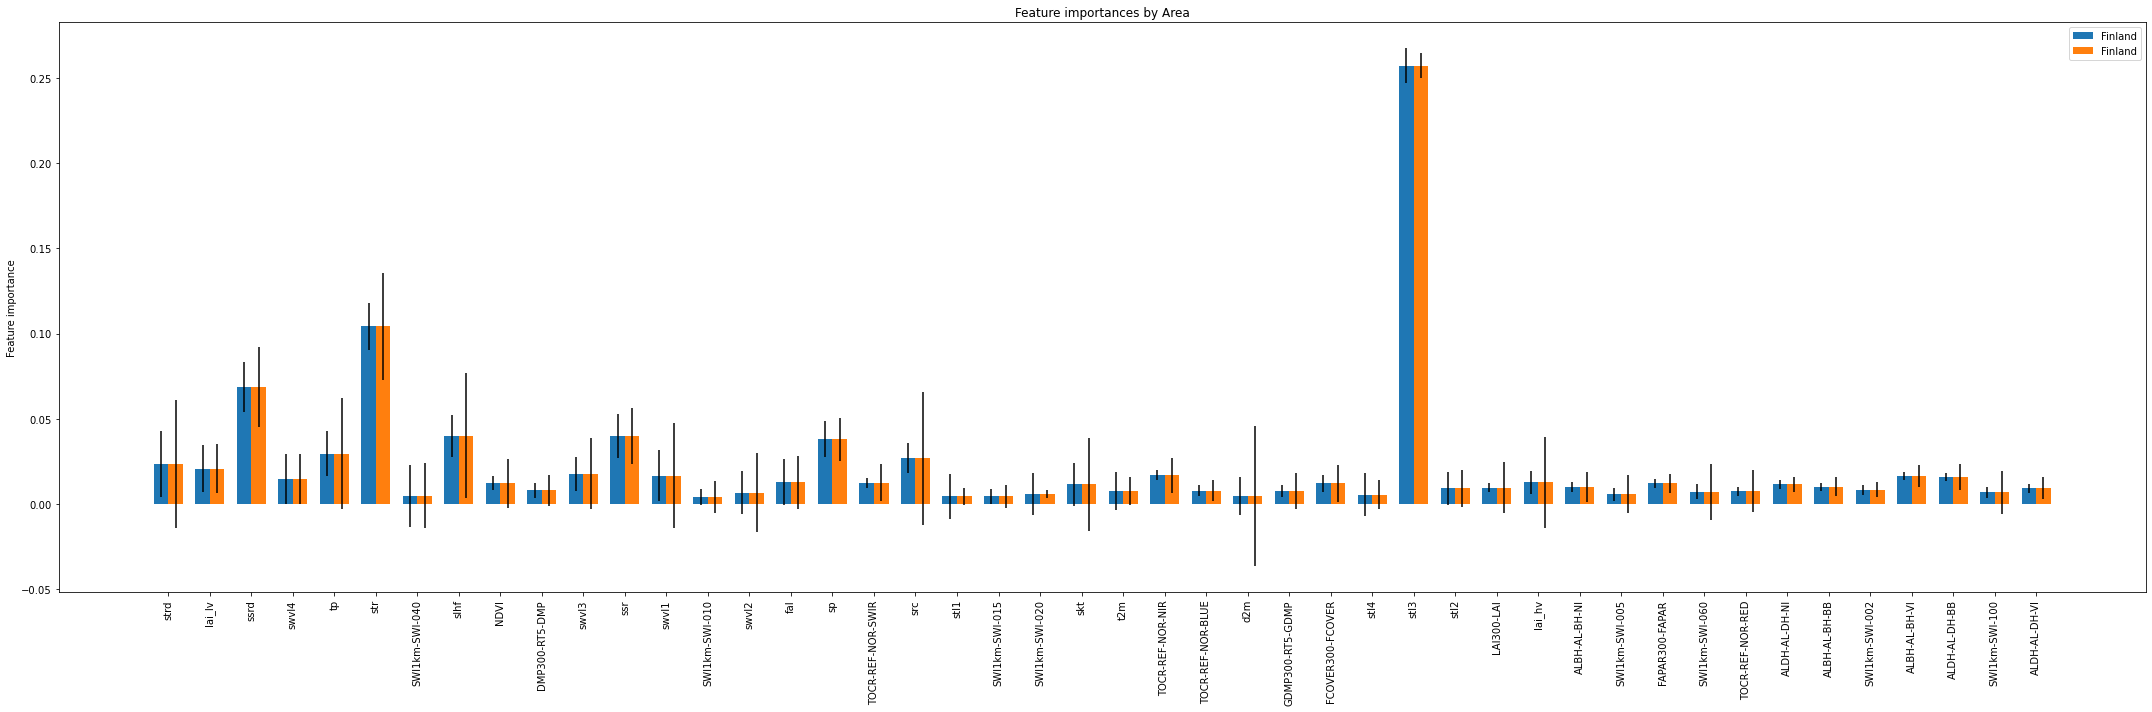

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances_fi)[::-1]
#indices = indices[:20]
feat_names = list(bu.drop(columns=[regression_label]).columns.values) 
names = [feat_names[i] for i in indices]


labels = names
fr_means = importances_fr[indices]
it_means = importances_it[indices]
bu_means = importances_bu[indices]
fi_means = importances_fi[indices]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x - width/2, it_means, width, label='Finland', yerr=std_fi[indices])
#rects2 = ax.bar(x - width/4, it_means, width, label='Italy')
#rects3 = ax.bar(x + width/4, bu_means, width, label='Bulgaria')
rects4 = ax.bar(x + width/2, bu_means, width, label='Finland', yerr=std_fr[indices],)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature importance')
ax.set_title('Feature importances by Area')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()

plt.show()

In [22]:
it.describe()

,habitat_richness,NDVI,ALBH-AL-BH-VI,ALBH-AL-BH-BB,ALBH-AL-BH-NI,ALDH-AL-DH-NI,ALDH-AL-DH-VI,ALDH-AL-DH-BB,DMP300-RT5-DMP,FAPAR300-FAPAR,...,ssr,str,sp,ssrd,strd,tp,swvl1,swvl2,swvl3,swvl4
count,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000,...,1.738700e+04,1.738700e+04,17387.000000,1.738700e+04,1.738700e+04,17387.000000,17387.000000,17387.000000,17387.000000,17387.000000
mean,0.347814,207.448035,440.982884,1769.351153,2701.463314,2061.583329,529.534422,1417.997010,9730.056908,128.878487,...,1.248173e+07,-4.987362e+06,93768.397383,1.489797e+07,2.740911e+07,0.003312,0.344974,0.346578,0.340406,0.374875
std,0.073995,28.558934,123.536460,179.413060,284.975463,279.732072,286.319154,233.972063,1697.487967,26.217156,...,3.540586e+05,4.047451e+05,3561.758347,2.981752e+05,6.232524e+05,0.000490,0.018227,0.017545,0.019193,0.014856
min,0.043478,59.333333,47.000000,217.000000,260.000000,877.000000,239.000000,668.000000,-2.000000,26.888889,...,1.160522e+07,-6.271293e+06,85057.734000,1.425301e+07,2.631730e+07,0.001693,0.262658,0.286981,0.269559,0.272963
25%,0.297331,194.333333,362.000000,1664.000000,2531.000000,1872.000000,453.000000,1288.000000,8716.208333,108.555556,...,1.224969e+07,-5.282506e+06,90832.620000,1.474833e+07,2.691194e+07,0.002975,0.335549,0.337761,0.327281,0.371059
50%,0.346522,214.888889,432.000000,1779.750000,2715.500000,2043.000000,503.500000,1402.085140,9836.166667,127.333333,...,1.246385e+07,-5.005538e+06,93870.900000,1.489435e+07,2.737516e+07,0.003306,0.347462,0.347651,0.342903,0.376750
75%,0.397577,227.833333,511.000000,1891.000000,2895.000000,2239.000000,552.000000,1525.000000,10941.503472,147.666667,...,1.263494e+07,-4.732039e+06,96596.510000,1.502604e+07,2.788114e+07,0.003708,0.357757,0.358442,0.355033,0.382673
max,0.544446,250.000000,3933.000000,3711.000000,4168.000000,4113.000000,5837.000000,4801.000000,15072.888889,255.000000,...,1.455645e+07,-3.708556e+06,101794.030000,1.606106e+07,2.919787e+07,0.004253,0.405954,0.421237,0.430248,0.475594


In [23]:
bu.describe()

,habitat_richness,NDVI,ALBH-AL-BH-VI,ALBH-AL-BH-BB,ALBH-AL-BH-NI,ALDH-AL-DH-VI,ALDH-AL-DH-BB,ALDH-AL-DH-NI,DMP300-RT5-DMP,FAPAR300-FAPAR,...,ssr,str,sp,ssrd,strd,tp,swvl1,swvl2,swvl3,swvl4
count,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,...,1.445800e+04,1.445800e+04,14458.000000,1.445800e+04,1.445800e+04,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000
mean,0.571897,224.234241,2201.891461,3157.204593,3827.146113,292.014079,1522.596665,2379.928791,9663.250923,113.437984,...,1.177263e+07,-4.900462e+06,91206.727046,1.404854e+07,2.624575e+07,0.003268,0.365435,0.364609,0.358006,0.356549
std,0.173194,24.180488,3719.474134,3270.930473,2968.463858,107.605325,227.202338,358.911041,1942.923561,21.319940,...,4.412393e+05,4.865731e+05,3738.002178,4.066813e+05,8.155210e+05,0.000531,0.020738,0.022353,0.026829,0.027691
min,0.035714,67.444444,51.000000,487.000000,606.000000,28.000000,605.000000,887.000000,1070.111111,47.416667,...,1.069704e+07,-6.124088e+06,79576.470000,1.326964e+07,2.497625e+07,0.001926,0.300468,0.288828,0.260126,0.250121
25%,0.532096,216.222222,350.000000,1519.000000,2284.000000,219.000000,1421.000000,2216.000000,8507.770833,98.083333,...,1.146431e+07,-5.213838e+06,89033.055000,1.371883e+07,2.564864e+07,0.002870,0.356270,0.355273,0.345516,0.339847
50%,0.604809,230.750000,445.000000,1719.000000,2633.000000,281.000000,1563.526864,2448.000000,9974.187500,112.333333,...,1.189345e+07,-4.970902e+06,91317.490000,1.413372e+07,2.612173e+07,0.003225,0.368158,0.367996,0.362139,0.361967
75%,0.679673,240.750000,634.000000,1924.000000,2929.000000,351.000000,1674.500000,2628.000000,10954.770833,127.000000,...,1.214111e+07,-4.548951e+06,93334.811250,1.440357e+07,2.689041e+07,0.003700,0.379426,0.379389,0.376506,0.377347
max,0.952827,250.000000,10000.000000,10000.000000,10000.000000,3393.000000,3211.000000,3761.000000,15528.111111,255.000000,...,1.282335e+07,-3.310588e+06,100761.650000,1.466592e+07,2.837961e+07,0.004529,0.459763,0.460727,0.457843,0.459092
